# Multiple linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
x,y = make_regression(n_samples=100,n_features=4,noise = 15)
x.shape

(100, 4)

In [3]:
y.shape

(100,)

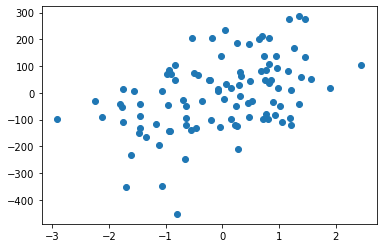

In [4]:
plt.scatter(x[:,0],y)

In [5]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3
0,-0.662507,-0.926329,-2.662596,-0.096421
1,0.745556,-1.107799,0.993758,0.561968
2,-0.955705,-0.584561,0.557703,0.243451
3,-0.642062,-1.225346,-0.808480,-0.195621
4,-0.940673,1.729791,0.659050,0.026246


In [6]:
y[:5]

array([-245.62894558,   48.08057406,  -43.54768001, -121.88858027,
         86.48368241])

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Using Scikit-Learn

In [8]:
clf = LinearRegression()
clf.fit(x,y)

LinearRegression()

In [9]:
print(clf.coef_)
print(clf.intercept_)

[57.40076351 70.1623056  48.7905779  84.51202121]
-0.38170360213792254


In [10]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [11]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9876384110432723
0.9839567342132737


In [12]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

219.92902143285838
261.86753925547146


# Multiple Linear Regression from Scratch using OLS
I use OLS to find coefficient and intercept but, Sklearn use Gradient descent to find the coefficient, since at higher number of independent variable time complexity of OLS method increases drastically, where SGD has low time complexity.

In [13]:
class Mlr:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,x_train,y_train):
        x_train = np.insert(x_train.values,0,1,axis=1)
        coef = np.dot(np.linalg.inv(np.dot(x_train.T,x_train)),np.dot(x_train.T,y_train))
        self.coef_ = coef[1:]
        self.intercept_ = coef[0]
        print(self.coef_)
        print(self.intercept_)
        
    def predict(self,x_test):
        y_pred = np.dot(x_test.values,self.coef_) + self.intercept_
        return y_pred

In [14]:
clf1 = Mlr()

In [15]:
clf1.fit(x_train,y_train)

[56.7457971  70.24390942 48.10590782 84.6081711 ]
-0.9705223114711601


In [16]:
y_train_pred = clf1.predict(x_train)
y_test_pred = clf1.predict(x_test)

In [17]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9877136473613931
0.9832390057521899


In [18]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

218.5904677988192
273.5827217162099


# Multilple Linear Regression from Scratch using Gradient Descent

In [19]:
class mlrgd:
    
    def __init__(self,learning_rate,epoch):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epoch = epoch
        
    def fit(self,x_train,y_train):
        x_train = x_train.values
        y_train = y_train
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1])
        for i in range(self.epoch):
            y_hat = np.dot(x_train,self.coef_) + self.intercept_
            m_grad = np.dot((y_train - y_hat).T,x_train)*(-2/x_train.shape[0])
            b_grad = (-2)*(np.mean(y_train-y_hat))
            self.coef_ = self.coef_- self.lr*m_grad
            self.intercept_ = self.intercept_- self.lr*b_grad
        print(self.coef_)
        print(self.intercept_)
        
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [20]:
clf2 = mlrgd(0.01,1000)

In [21]:
clf2.fit(x_train,y_train)

[56.74579711 70.24390901 48.1059066  84.60816798]
-0.9705202020712634


In [22]:
y_test_pred = clf2.predict(x_test)
y_train_pred = clf2.predict(x_train)

In [23]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9877136473613923
0.9832390059694787


In [24]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

218.59046779883244
273.58271816949645
